<a href="https://colab.research.google.com/github/nureeee/DeepLearning/blob/main/YOLO_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
!ls -al '/gdrive/MyDrive/cv_lecture/darknet'

total 252586
drwx------ 2 root root      4096 Jul 21 03:42 backup
drwx------ 2 root root      4096 Jul 21 03:42 bin
drwx------ 2 root root      4096 Jul 21 03:42 cfg
drwx------ 2 root root      4096 Jul 21 03:42 custom
drwx------ 2 root root      4096 Jul 21 03:42 data
drwx------ 2 root root      4096 Jul 21 03:42 images
drwx------ 2 root root      4096 Jul 21 03:42 trafficsign
-rw------- 1 root root 258615009 Mar 18 02:18 Train.zip
drwx------ 2 root root      4096 Jul 21 03:42 weights


In [3]:
YOLO_WEIGHT_FILE = '/gdrive/My Drive/cv_lecture/darknet/weights/yolov3.weights'
YOLO_CFG_FILE    = '/gdrive/My Drive/cv_lecture/darknet/cfg/yolov3.cfg'
YOLO_NAME_FILE   = '/gdrive/My Drive/cv_lecture/darknet/data/coco.names'

In [4]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [5]:
min_confidence = 0.5

In [7]:
net = cv2.dnn.readNet(
    YOLO_WEIGHT_FILE,
    YOLO_CFG_FILE
)
net

<dnn_Net 0x7fbca9490a10>

In [8]:
classes = []

with open(YOLO_NAME_FILE, 'r') as f:
    classes = [line.strip() for line in f.readlines()]
print(classes)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [17]:
output_layers = net.getUnconnectedOutLayersNames()
output_layers

['yolo_82', 'yolo_94', 'yolo_106']

In [18]:
layer_names = net.getLayerNames()
print(layer_names)

['conv_0', 'bn_0', 'relu_0', 'conv_1', 'bn_1', 'relu_1', 'conv_2', 'bn_2', 'relu_2', 'conv_3', 'bn_3', 'relu_3', 'shortcut_4', 'conv_5', 'bn_5', 'relu_5', 'conv_6', 'bn_6', 'relu_6', 'conv_7', 'bn_7', 'relu_7', 'shortcut_8', 'conv_9', 'bn_9', 'relu_9', 'conv_10', 'bn_10', 'relu_10', 'shortcut_11', 'conv_12', 'bn_12', 'relu_12', 'conv_13', 'bn_13', 'relu_13', 'conv_14', 'bn_14', 'relu_14', 'shortcut_15', 'conv_16', 'bn_16', 'relu_16', 'conv_17', 'bn_17', 'relu_17', 'shortcut_18', 'conv_19', 'bn_19', 'relu_19', 'conv_20', 'bn_20', 'relu_20', 'shortcut_21', 'conv_22', 'bn_22', 'relu_22', 'conv_23', 'bn_23', 'relu_23', 'shortcut_24', 'conv_25', 'bn_25', 'relu_25', 'conv_26', 'bn_26', 'relu_26', 'shortcut_27', 'conv_28', 'bn_28', 'relu_28', 'conv_29', 'bn_29', 'relu_29', 'shortcut_30', 'conv_31', 'bn_31', 'relu_31', 'conv_32', 'bn_32', 'relu_32', 'shortcut_33', 'conv_34', 'bn_34', 'relu_34', 'conv_35', 'bn_35', 'relu_35', 'shortcut_36', 'conv_37', 'bn_37', 'relu_37', 'conv_38', 'bn_38', 're

In [19]:
colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [20]:
from google.colab import files
files.upload()

Saving car1.jpg to car1 (1).jpg


{'car1.jpg': b'\xff\xd8\xff\xfe\x00\x10Lavc56.60.100\x00\xff\xdb\x00C\x00\x08\x10\x10\x13\x10\x13\x16\x16\x16\x16\x16\x16\x1a\x18\x1a\x1b\x1b\x1b\x1a\x1a\x1a\x1a\x1b\x1b\x1b\x1d\x1d\x1d"""\x1d\x1d\x1d\x1b\x1b\x1d\x1d  ""%&%##"#&&(((00..88:EES\xff\xc4\x01\xa2\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\x01\x00\x03\x01\x01\x01\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\xd2\xd3\xd4\xd5\xd6\xd7\xd8\xd9\xda\xe1\xe2\xe3\xe4\xe5\xe6\xe7\xe8\xe9\xea\xf1\xf2\xf3\xf4\xf5\xf6\xf7

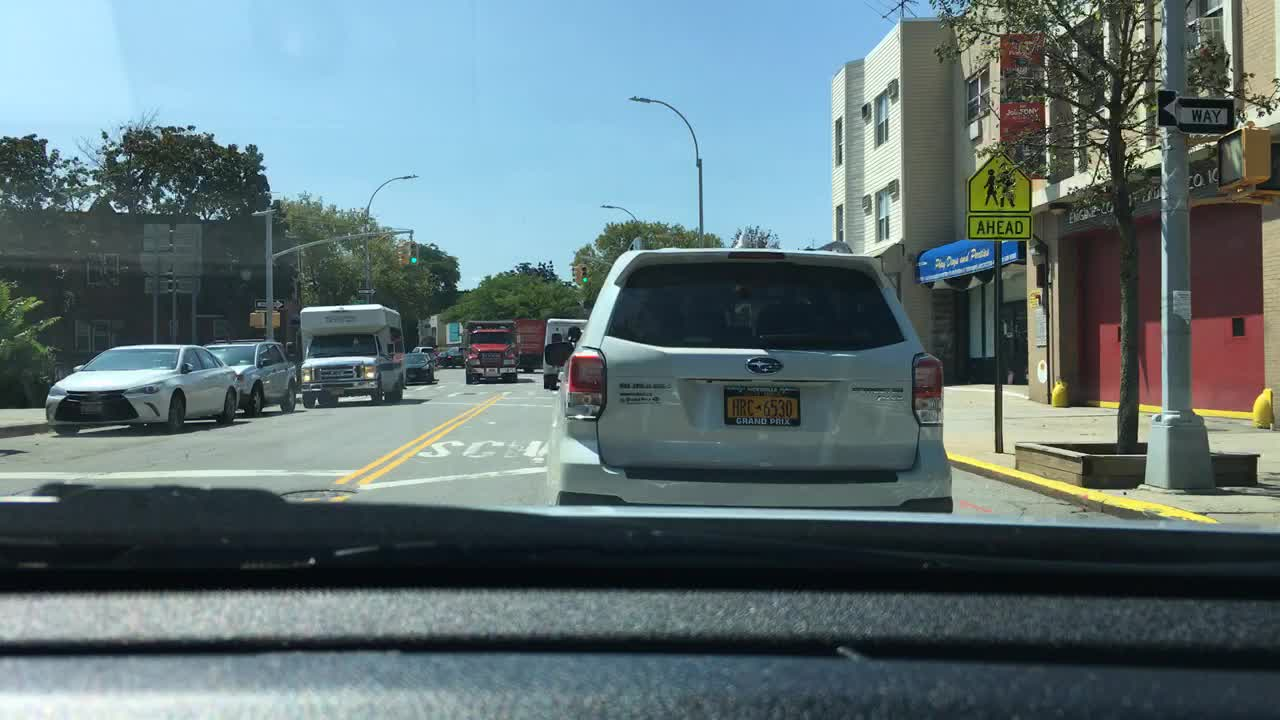

In [21]:
file_name = 'car1.jpg'

img = cv2.imread(file_name)
height, width, channels = img.shape

cv2_imshow(img)

In [26]:
blob = cv2.dnn.blobFromImage(
    img,
    scalefactor = 1/255.0,
    size=(416, 416),
    mean=(0, 0, 0),
    swapRB=True,
    crop=False,
)

In [28]:
net.setInput(blob)
outs = net.forward(output_layers)

In [29]:
len(outs)

3

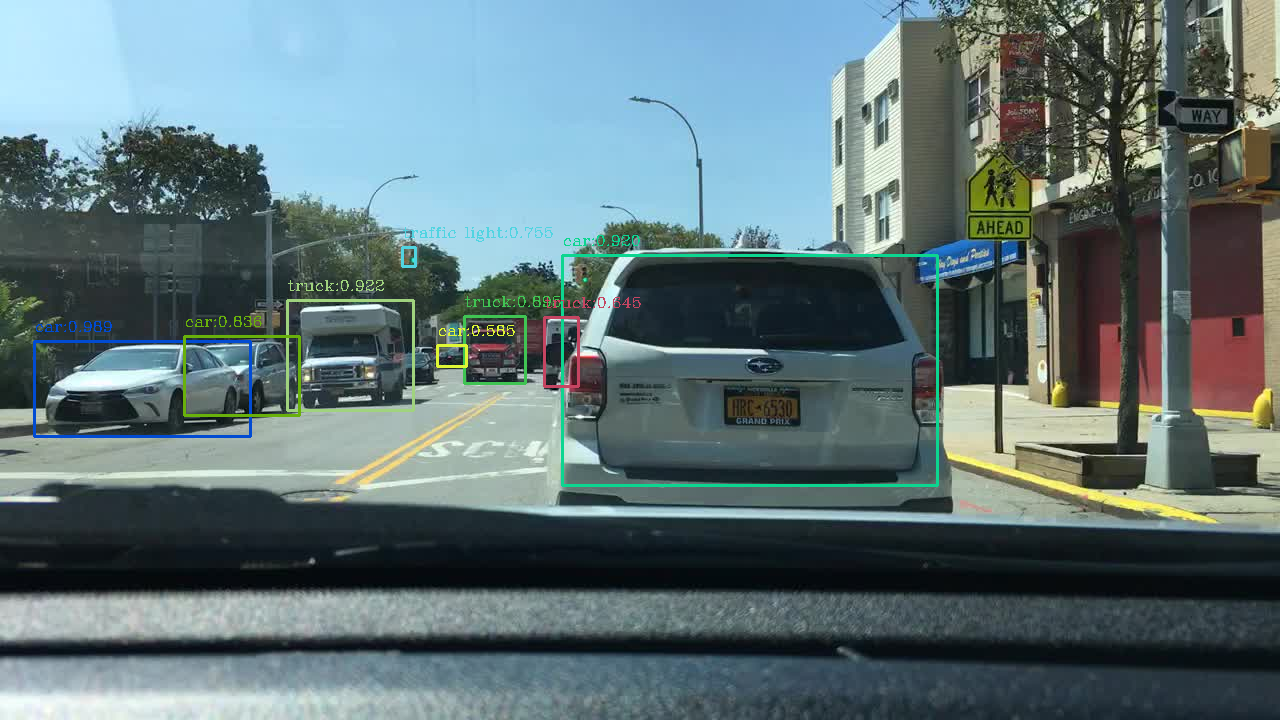

In [40]:
class_ids = []
confidences = []
boxes = []

for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)

        confidence = scores[class_id]

        if confidence > min_confidence:
            # print(class_id, confidence)

            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)

            w = int(detection[2] * width)
            h = int(detection[3] * height)

            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(confidence.astype('float'))
            class_ids.append(class_id)
    
indexes = cv2.dnn.NMSBoxes(boxes, confidences, min_confidence, 0.4)

frame = img.copy()
for i in indexes:
    idx = i[0]
    x, y, w, h = boxes[idx]

    label = '{}:{:.3f}'.format(str(classes[class_ids[idx]]), confidences[idx])

    color = colors[idx]

    cv2.rectangle(frame, (x, y), (x+w, y+h), color, 2)
    cv2.putText(frame, label, (x, y-10), cv2.FONT_HERSHEY_COMPLEX, 0.5, color, 1)

cv2_imshow(frame) 